<a href="https://colab.research.google.com/github/LucasFerrSil/Fenomenos-Eletromagneticos/blob/main/ELETROMAG_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Aproximação da curva

def alpha(x):
  soma = 0
  inc = 0
  for i in range(len(x)):
    soma += 1/x[i][0]**2
    inc += abs(2*x[i][1]/(x[i][0]**3))
  return [soma,inc**(1/2)]

def beta(x):
  soma = 0
  inc = 0
  for i in range(len(x)):
    soma += 1/x[i][0]
    inc += (x[i][1]/(x[i][0]**2))**2
  return [soma,inc**(1/2)]

def gama(x,y):
  soma = 0
  inc = 0
  for i in range(len(x)):
    soma += y[i][0]/x[i][0]
    inc += (x[i][1]*y[i][0]/(x[i][0]**2))**2 + (y[i][1]/(x[i][0]))**2
  return [soma,inc**(1/2)]

def phi(y):
  soma = 0
  inc = 0
  for i in range(len(y)):
    soma += y[i][0]
    inc += y[i][1]**2
  return [soma,inc**(1/2)]

In [ ]:
#MMQ

def somav(v):
  soma = 0
  for i in range(len(v)):
      valor = 1/((v[i][1])**2)
      soma += valor
  return soma

def somx(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = x[i][0]/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def sox2(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = ((x[i][0])**2)/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def somay(x,y,valor):
  soma = 0
  for i in range(len(y)):
      termo = (y[i][0])/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def somaxy(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = (x[i][0])*(y[i][0])/(y[i][1])**2
      soma += termo
  soma = soma/valor
  return soma

def a(somax,somay,somaxy,somax2,valor):
  a = ((somax*somay) - somaxy)/((somax**2) - somax2)
  t = abs(1/(valor*((somax2) - (somax**2))))
  x = [a,t**(1/2)]
  return x

def b(somay,a,somax,somax2,valor):
  b = somay - a[0]*somax
  t = abs((somax2/valor)/((somax2) - (somax**2)))
  x = [b,t**(1/2)]
  return x

In [ ]:
def desviopadrao(vetor):
    soma = 0
    c = len(vetor)
    for i in range(c):
        soma += vetor[i][0]
    media = soma/c
    soma_dos_quadrados = 0
    for i in range(c):
        soma_dos_quadrados += (vetor[i][0] - media)**2
    desvio = (soma_dos_quadrados/(c*(c - 1)))**(1/2)
    x = [media,desvio]
    return x

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
cres = [8.5,0.6]
d1 = [[5.0,0.5],[10,0.5],[15,0.5],[20,0.5],[25,0.5],[30,0.5],[35,0.5],[40,0.5],[45,0.5],[50,0.5]]
d2 = [[6.0,0.5],[11.5,0.5],[16,0.5],[21.5,0.5],[26,0.5],[32,0.5],[35,0.5],[39,0.5],[46,0.5],[51.5,0.5]]
d3 = [[6.0,0.5],[12,0.5],[16.5,0.5],[22,0.5],[27,0.5],[31.5,0.5],[37,0.5],[42,0.5],[47,0.5],[53,0.5]]
cmed = [[42.3,0.9],[24.6,0.7],[20.3,0.7],[17.7,0.7],[16.3,0.7],[14.8,0.6],[14.1,0.6],[13.6,0.6],[13,0.6],[12.6,0.6]]
diametro = [149.9,0.5]

metro = lambda x:[x[0]/1000,x[1]/1000]
farad = lambda x:[x[0]*10**(-12),x[1]*10**-(12)]

d1 = list(map(metro,d1))
d2 = list(map(metro,d2))
d3 = list(map(metro,d3))
diametro = metro(diametro)
cres = farad(cres)
cmed = list(map(farad,cmed))

media = lambda x1,x2,x3:desviopadrao([x1,x2,x3])
inverso = lambda x:[1/x[0],abs((x[1]/(x[0]**2)))]

dmed = list(map(media,d1,d2,d3))
w = list(map(inverso,dmed))

x1 = w
y = cmed

valor = somav(y)
somax2 = somx(x1,y,valor)
somax22 = sox2(x1,y,valor)
somay12 = somay(x1,y,valor)
somaxy12 = somaxy(x1,y,valor)
a1 = a(somax2,somay12,somaxy12,somax22,valor)
b1 = b(somay12,a1,somax2,somax22,valor)

subtracao = lambda x:[x[0]-b1[0],(x[1]**2+b1[1]**2)**(1/2)]
ccap = list(map(subtracao,cmed))
Fepsilon1 = lambda ccap,distancia:[ccap[0]*distancia[0]*4/(math.pi*diametro[0]**2),((ccap[1]*distancia[0]*4/(math.pi*diametro[0]**2))**2 + (ccap[0]*distancia[1]*4/(math.pi*diametro[0]**2))**2 + (ccap[0]*distancia[0]*8*diametro[1]/(math.pi*diametro[0]**3))**2)**(1/2)]
epsilon1 = list(map(Fepsilon1,ccap,dmed))
epsilon1desv = desviopadrao(epsilon1)

Fepsilon2 = lambda a:[4*a[0]/(math.pi*diametro[0]**2),((4*a[1]/(math.pi*diametro[0]**2))**2 + (8*a[0]*diametro[1]/(math.pi*diametro[0]**3))**2)**(1/2)]
epsilon2 = Fepsilon2(a1)

C = lambda alpha,beta,gama,phi,n: (n*gama[0]-phi[0]*beta[0])/(n*alpha[0]-beta[0]**2)
D = lambda alpha,beta,gama,phi,n: (phi[0]*alpha[0]-beta[0]*gama[0])/(n*alpha[0]-beta[0]**2)

alpha1 = alpha(dmed)
beta1 = beta(dmed)
gama1 = gama(dmed,cmed)
phi1 = phi(cmed)

c = C(alpha1,beta1,gama1,phi1,len(dmed))
d = D(alpha1,beta1,gama1,phi1,len(dmed))


In [ ]:
tabela = [[d1[i][0]*1000,d2[i][0]*1000,d3[i][0]*1000,round(dmed[i][0]*1000,1),round(dmed[i][1]*1000,1),round(ccap[i][0]*10**12,1),round(ccap[i][1]*10**12,1),cmed[i][0]*10**12,cmed[i][1]*10**12,round(w[i][0],3),round(w[i][1],3)] for i in range(len(w))]
colunas = ['d1 (mm)','d2 (mm)','d3 (mm)','dm (mm)','sigma d1 (mm)','c capacitor (pF)','sigma capacitor (pF)','c medido (pF)','sigma c medido (pF)','w = 1/d (m^-1)','sigma w (m^-1)']
df = pd.DataFrame(tabela, columns = colunas)

display(df)

,d1 (mm),d2 (mm),d3 (mm),dm (mm),sigma d1 (mm),c capacitor (pF),sigma capacitor (pF),c medido (pF),sigma c medido (pF),w = 1/d (m^-1),sigma w (m^-1)
0,5.0,6.0,6.0,5.7,0.3,33.4,1.0,42.3,0.9,176.471,10.381
1,10.0,11.5,12.0,11.2,0.6,15.7,0.8,24.6,0.7,89.552,4.819
2,15.0,16.0,16.5,15.8,0.4,11.4,0.8,20.3,0.7,63.158,1.759
3,20.0,21.5,22.0,21.2,0.6,8.8,0.8,17.7,0.7,47.244,1.341
4,25.0,26.0,27.0,26.0,0.6,7.4,0.8,16.3,0.7,38.462,0.854
5,30.0,32.0,31.5,31.2,0.6,5.9,0.7,14.8,0.6,32.086,0.619
6,35.0,35.0,37.0,35.7,0.7,5.2,0.7,14.1,0.6,28.037,0.524
7,40.0,39.0,42.0,40.3,0.9,4.7,0.7,13.6,0.6,24.793,0.542
8,45.0,46.0,47.0,46.0,0.6,4.1,0.7,13.0,0.6,21.739,0.273
9,50.0,51.5,53.0,51.5,0.9,3.7,0.7,12.6,0.6,19.417,0.327


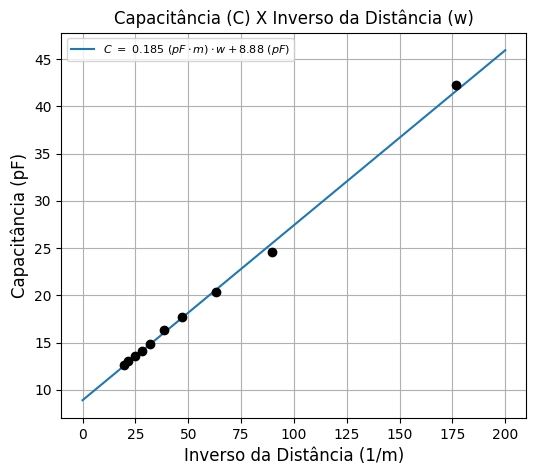

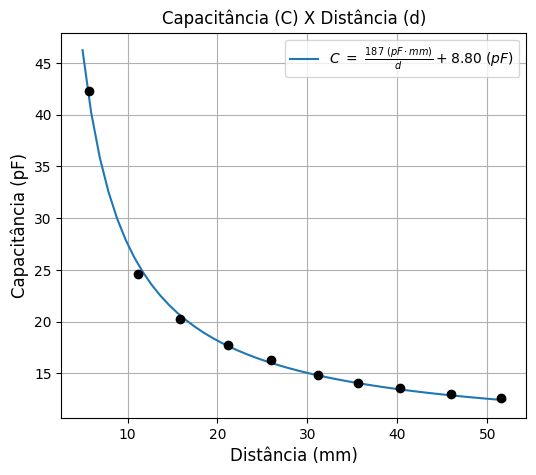

In [ ]:
x = np.linspace(0,200)
y1 = a1[0]*x*10**12+b1[0]*10**12
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlabel('Inverso da Distância (1/m)', fontsize = 12)
ax.set_ylabel('Capacitância (pF)', fontsize = 12)
plt.grid()
ax.plot(x,y1,label=r'$C~=~0.185~(pF \cdot m)\cdot w+8.88~(pF)$')
ax.set_title('Capacitância (C) X Inverso da Distância (w)')
for i in range(len(w)):
  ax.plot(w[i][0],cmed[i][0]*10**(12),'ok')

ax.legend(prop = {"size" : 8})
plt.savefig('CD.png')
x = np.linspace(0.005*1000,0.052*1000)
y2 = (c*10**12)/x*1000 + d*10**12

fig,ax1 = plt.subplots(figsize=(6,5))
plt.grid()
ax1.plot(x,y2,label=r'$C~=~\frac{187~(pF \cdot mm)}{d}+8.80~(pF)$')
ax1.set_title('Capacitância (C) X Distância (d)')
ax1.set_ylabel('Capacitância (pF)',fontsize = 12)
ax1.set_xlabel('Distância (mm)',fontsize = 12)

for i in range(len(dmed)):
  ax1.plot(dmed[i][0]*1000,cmed[i][0]*10**12,'ok')

ax1.legend(prop = {"size" : 10})
plt.savefig('CporD.png')

In [ ]:
epsilonI = 4*c/(math.pi*diametro[0]**2) #medido a partir da aproximação C X d
cresI = d
print(epsilonI)
epsilonMMQ = epsilon2 #medido a partir do MMQ
cresMMQ = b1

epsilonMedia = epsilon1desv #Medido a partir da capacitancia medida - capacitancia residual do MMQ
cresMedia = cresMMQ

colunas = ['Epsilon CxD','Sigma da Capacitância CxD','Capacitancia residual da curva CxD','Sigma da capacitância residual da curva CxD','Epsilon do MMQ','Sigma do epsilon do MMQ','Capacitância residual do MMQ','Sigma da capacitância residual do MMQ','Epsilon proveniente da capacitância do capacitor média','Sigma da capacitância do capacitor média','Capacitância residual da C capacitor média','Sigma da C capacitor média']
tabela2 = [[epsilonI,'Não Calculado',cresI,'Não Calculado',epsilonMMQ[0],epsilonMMQ[1],cresMMQ[0],cresMMQ[1],epsilonMedia[0],epsilonMedia[1],cresMedia[0],cresMedia[1]]]

df2 = pd.DataFrame(tabela2,columns=colunas)
display(df2)

1.0604474174550218e-11


,Epsilon CxD,Sigma da Capacitância CxD,Capacitancia residual da curva CxD,Sigma da capacitância residual da curva CxD,Epsilon do MMQ,Sigma do epsilon do MMQ,Capacitância residual do MMQ,Sigma da capacitância residual do MMQ,Epsilon proveniente da capacitância do capacitor média,Sigma da capacitância do capacitor média,Capacitância residual da C capacitor média,Sigma da C capacitor média
0,1.060447e-11,Não Calculado,8.806123e-12,Não Calculado,1.050219e-11,3.250185e-13,8.886708e-12,3.275500e-13,1.057122e-11,9.448709e-14,8.886708e-12,3.275500e-13
